In [2]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Seed for reproducibility
random.seed(42)

# Define the possible values for each feature
education_levels = ['Bachelor\'s', 'Master\'s', 'PhD']
job_titles = ['Data Analyst', 'Software Engineer', 'Research Scientist', 'Intern', 'Project Manager', 'ML Engineer', 'Junior Developer', 'Senior Developer', 'Team Lead']
skills = ['SQL, R, Python', 'Java, Python, SQL', 'Python, TensorFlow', 'JavaScript, React', 'Python, Management', 'TensorFlow, Keras', 'JavaScript, HTML', 'Python, Django', 'Leadership, Java', 'React, HTML']
certifications = ['None', 'AWS Certified', 'GCP Certified', 'PMP', 'Azure Certified', 'Leadership Certified']
projects = ['Data Analysis with Python', 'Web Development with Java', 'ML Model with TensorFlow', 'Website with React', 'Team Management System', 'Deep Learning Project', 'Frontend Development', 'Backend Development', 'Project Leadership', 'Web App with React']
courses = ['Data Science', 'Full Stack Development', 'Machine Learning', 'Frontend Development', 'Management', 'Deep Learning', 'Web Development', 'Backend Development', 'Leadership']
jobs_applying_for = ['Data Scientist', 'Full Stack Developer', 'ML Engineer', 'Frontend Developer', 'Project Manager', 'AI Specialist', 'Frontend Developer', 'Backend Developer', 'Team Lead']

# Generate sample data
sample_data = []
for _ in range(10000):
    sample_data.append({
        'Education Level': random.choice(education_levels),
        'Years of Experience': random.randint(1, 10),
        'Previous Job Titles': random.choice(job_titles),
        'Skills': random.choice(skills),
        'Certifications': random.choice(certifications),
        'Projects': random.choice(projects),
        'Courses': random.choice(courses),
        'Job Applying For': random.choice(jobs_applying_for)
    })

# Convert to DataFrame
df_sample = pd.DataFrame(sample_data)

# Define a function to create labels
def is_match(row):
    job = row['Job Applying For'].lower()
    skills = row['Skills'].lower()
    projects = row['Projects'].lower()
    courses = row['Courses'].lower()
    
    return int(any(keyword in skills or keyword in projects or keyword in courses for keyword in job.split()))

df_sample['Match'] = df_sample.apply(is_match, axis=1)

# Define features and labels
X = df_sample.drop(columns=['Job Applying For', 'Match'])
y = df_sample['Match']

# Preprocess data
numeric_features = ['Years of Experience']
categorical_features = ['Education Level', 'Previous Job Titles', 'Skills', 'Certifications', 'Projects', 'Courses']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)

# Combine models into a voting classifier
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('svc', svc)], voting='soft')

# Train model
ensemble_model.fit(X_train, y_train)

# Evaluate model
y_pred = ensemble_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Save the sample data to CSV
df_sample.to_csv('sample_job_data_1000_new.csv', index=False)
print('Sample data saved to sample_job_data.csv')


Accuracy: 0.8035
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1615
           1       0.10      0.00      0.01       385

    accuracy                           0.80      2000
   macro avg       0.45      0.50      0.45      2000
weighted avg       0.67      0.80      0.72      2000

Sample data saved to sample_job_data.csv


In [3]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Seed for reproducibility
random.seed(42)

# Define the possible values for each feature
education_levels = ['Bachelor\'s', 'Master\'s', 'PhD']
job_titles = ['Data Analyst', 'Software Engineer', 'Research Scientist', 'Intern', 'Project Manager', 'ML Engineer', 'Junior Developer', 'Senior Developer', 'Team Lead']
skills = ['SQL, R, Python', 'Java, Python, SQL', 'Python, TensorFlow', 'JavaScript, React', 'Python, Management', 'TensorFlow, Keras', 'JavaScript, HTML', 'Python, Django', 'Leadership, Java', 'React, HTML']
certifications = ['None', 'AWS Certified', 'GCP Certified', 'PMP', 'Azure Certified', 'Leadership Certified']
projects = ['Data Analysis with Python', 'Web Development with Java', 'ML Model with TensorFlow', 'Website with React', 'Team Management System', 'Deep Learning Project', 'Frontend Development', 'Backend Development', 'Project Leadership', 'Web App with React']
courses = ['Data Science', 'Full Stack Development', 'Machine Learning', 'Frontend Development', 'Management', 'Deep Learning', 'Web Development', 'Backend Development', 'Leadership']
jobs_applying_for = ['Python Developer', 'Java Developer', 'Full Stack Developer', 'Frontend Developer', 'Backend Developer']

# Generate sample data
sample_data = []
for _ in range(10000):
    sample_data.append({
        'Education Level': random.choice(education_levels),
        'Years of Experience': random.randint(0, 10),
        'Previous Job Titles': random.choice(job_titles),
        'Skills': random.choice(skills),
        'Certifications': random.choice(certifications),
        'Projects': random.choice(projects),
        'Courses': random.choice(courses),
        'Job Applying For': random.choice(jobs_applying_for)
    })

# Convert to DataFrame
df_sample = pd.DataFrame(sample_data)

# Define required skills for each role
required_skills = {
    'Python Developer': ['python', 'django', 'tensorflow'],
    'Java Developer': ['java', 'spring', 'hibernate'],
    'Full Stack Developer': ['javascript', 'react', 'html', 'css'],
    'Frontend Developer': ['javascript', 'react', 'html', 'css'],
    'Backend Developer': ['java', 'python', 'sql']
}

# Define a function to create labels
def is_match(row):
    job = row['Job Applying For']
    skills = row['Skills'].lower().split(', ')
    projects = row['Projects'].lower().split(', ')
    courses = row['Courses'].lower().split(', ')
    
    keywords = required_skills.get(job, [])
    matched_skills = sum(1 for skill in skills if skill in keywords)
    
    # Ensure at least two of the required skills are present
    return int(matched_skills >= 2)

df_sample['Match'] = df_sample.apply(is_match, axis=1)

# Define features and labels
X = df_sample.drop(columns=['Job Applying For', 'Match'])
y = df_sample['Match']

# Preprocess data
numeric_features = ['Years of Experience']
categorical_features = ['Education Level', 'Previous Job Titles', 'Skills', 'Certifications', 'Projects', 'Courses']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)

# Combine models into a voting classifier
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('svc', svc)], voting='soft')

# Train model
ensemble_model.fit(X_train, y_train)

# Evaluate model
y_pred = ensemble_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Save the sample data to CSV
df_sample.to_csv('sample_job_data_10000.csv', index=False)
print('Sample data saved to sample_job_data.csv')


Accuracy: 0.7825
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      1570
           1       0.44      0.04      0.08       430

    accuracy                           0.78      2000
   macro avg       0.61      0.51      0.48      2000
weighted avg       0.71      0.78      0.70      2000

Sample data saved to sample_job_data.csv


In [7]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Classification Report:\n', classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8025
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1605
           1       0.00      0.00      0.00       395

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\mamle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mamle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mamle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('K-Nearest Neighbors Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1605
           1       0.32      0.12      0.17       395

    accuracy                           0.78      2000
   macro avg       0.56      0.53      0.52      2000
weighted avg       0.71      0.78      0.73      2000



In [10]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.709
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1605
           1       0.29      0.33      0.31       395

    accuracy                           0.71      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.72      0.71      0.72      2000



In [13]:
import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))


C:\Users\mamle\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7585
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1605
           1       0.30      0.17      0.22       395

    accuracy                           0.76      2000
   macro avg       0.56      0.54      0.54      2000
weighted avg       0.71      0.76      0.73      2000



In [14]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_ada))
print('Classification Report:\n', classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8025
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1605
           1       0.50      0.00      0.01       395

    accuracy                           0.80      2000
   macro avg       0.65      0.50      0.45      2000
weighted avg       0.74      0.80      0.72      2000



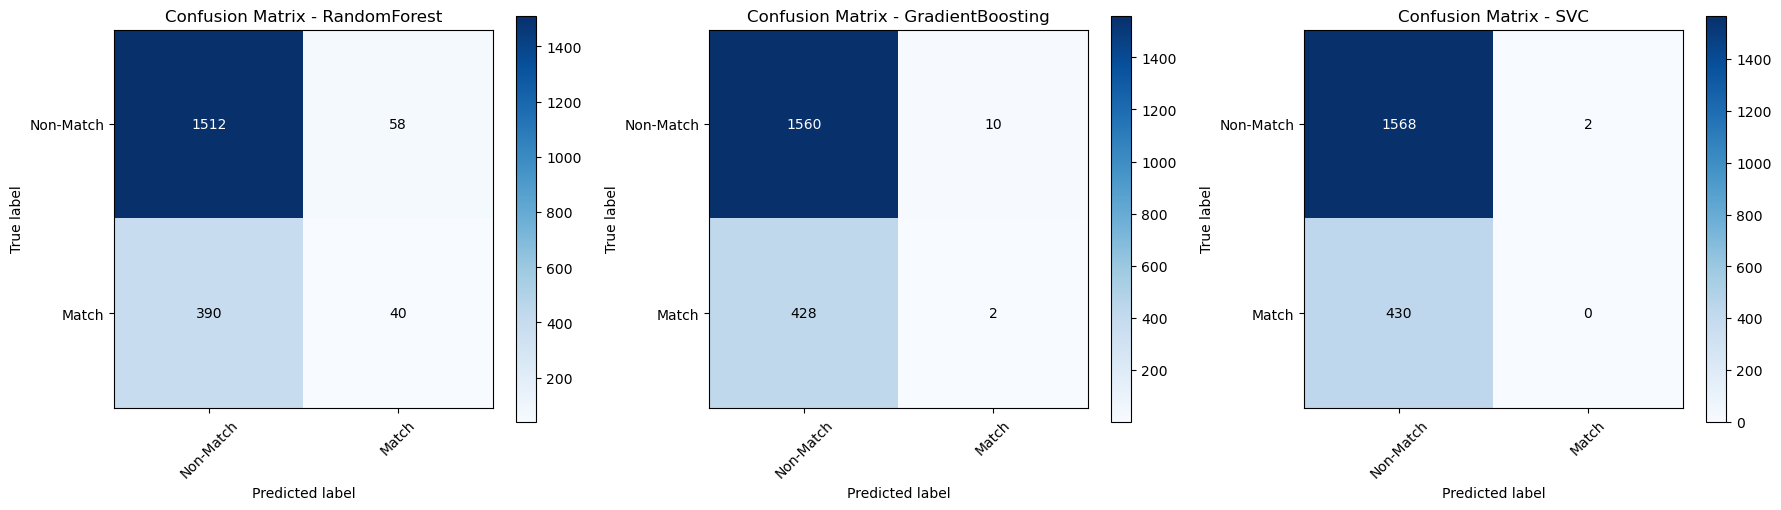

RandomForest:
  TP: 1512
  TN: 40
  FP: 390
  FN: 58
  F1 Score: 0.15
  Accuracy: 0.78

GradientBoosting:
  TP: 1560
  TN: 2
  FP: 428
  FN: 10
  F1 Score: 0.01
  Accuracy: 0.78

SVC:
  TP: 1568
  TN: 0
  FP: 430
  FN: 2
  F1 Score: 0.00
  Accuracy: 0.78



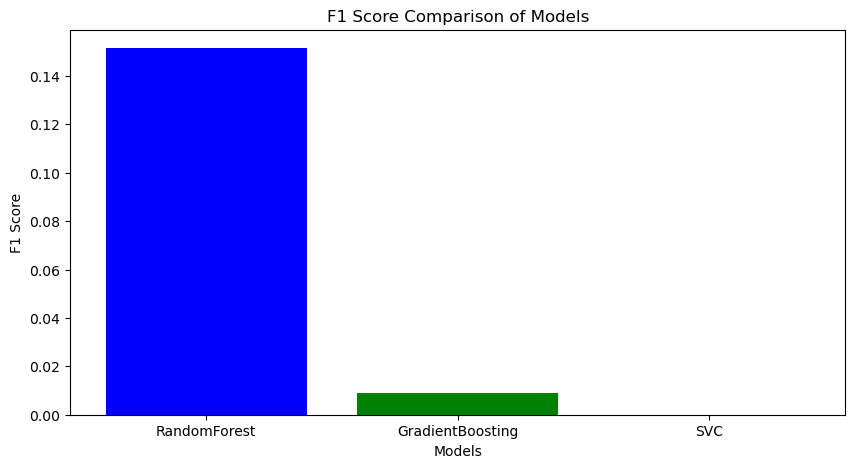

Model comparison results saved to model_comparison_results.csv


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, ax):
    classes = ['Non-Match', 'Match']
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Define individual models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
results = {}
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = cm.ravel()
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'F1 Score': f1,
        'Accuracy': accuracy_score(y_test, y_pred)
    }
    
    plot_confusion_matrix(cm, name, axs[i])

plt.tight_layout()
plt.show()

# Print results
for name, metrics in results.items():
    print(f"{name}:\n"
          f"  TP: {metrics['TP']}\n"
          f"  TN: {metrics['TN']}\n"
          f"  FP: {metrics['FP']}\n"
          f"  FN: {metrics['FN']}\n"
          f"  F1 Score: {metrics['F1 Score']:.2f}\n"
          f"  Accuracy: {metrics['Accuracy']:.2f}\n")

# Plot F1 Scores for comparison
model_names = list(results.keys())
f1_scores = [metrics['F1 Score'] for metrics in results.values()]

plt.figure(figsize=(10, 5))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Models')
plt.show()

# Save results to CSV
results_df = pd.DataFrame(results).T
results_df.to_csv('model_comparison_results.csv', index=True)
print('Model comparison results saved to model_comparison_results.csv')


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

x_train = tf.random.normal((100,10,8))
y_train = tf.random.uniform((100,), maxval=2, dtype=tf.int32)

model = Sequential()
model.add(SimpleRNN(64,input_shape=(10,8),activation='tanh'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x_train,y_train,epochs=5)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2061 - mae: 0.9044
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9054 - mae: 0.7741 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7951 - mae: 0.7272 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7307 - mae: 0.6817 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6651 - mae: 0.6390 


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

# Generating some random training data
x_train = tf.random.normal((100, 10, 8))
y_train = tf.random.normal((100, 1))

# Building the model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(10, 8), activation='tanh'))
model.add(Dense(1))

# Compiling the model with MSE loss and MAE metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summarizing the model
model.summary()

# Training the model
model.fit(x_train, y_train, epochs=5)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 64)                  │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.6371 - mae: 1.0241
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1541 - mae: 0.8520 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0087 - mae: 0.7861 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9350 - mae: 0.7619 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7550 - mae: 0.6795 
